In [1]:
""" 载入基础模块 """
import numpy as np
import matplotlib.pyplot as plt

In [2]:
""" 载入动力学模块 """
from module_reaction.kinetics_module import ReactionSystem

In [3]:
""" 构建动力学模型 1：输入参数 """

pulse_excitation_params = {
    'type': 'pulse',
    'wavelength': 430,  # nm
    'pulse_energy': 10,  # mJ
    }

steady_excitation_params = {
    'type': 'steady',
    'wavelength': 430,  # nm
    'power': 200,  # mW
    }

concentrations = [5e-5, 3e-2, 1e-2]  # [Ru, SA, CII] (M)
epsilon = 13680  # M⁻¹cm⁻¹

# 动力学参数 (双光子模型)
k_params_2photon = {
    'k1': 1e8,    # Ru*的猝灭速率
    'k2': 1.2e4,  # RuI的一级衰减
    'k3': 0,      # RuI的二级衰减
    'k4': 1e6,    # PCET基础速率常数
    'k5': 1e3,    # RuIIC的衰减到基态
    'k6': 1e8,    # 烯基自由基被RuI还原
    'k7': 0,      # 烯基自由基被SA还原
    'k8': 0       # RuIIC的BET
    }

# 动力学参数 (单光子模型)
k_params_1photon = {
    'k1': 1e8,    # Ru*的猝灭速率
    'k2': 1.2e4,  # RuI的一级衰减
    'k3': 0,      # RuI的二级衰减
    'k4': 1e6,    # PCET基础速率常数
    'k5': 1e3,    # RuIIC的衰减到基态
    'k6': 0,      # 烯基自由基被RuI还原
    'k7': 3e4,    # 烯基自由基被SA还原
    'k8': 0       # RuIIC的BET
    }

In [4]:
""" 构建动力学模型 2：建立模型 """
# 1. 建模
system_2hv = ReactionSystem(concentrations = concentrations, 
                            epsilon = epsilon,
                            excitation_params = pulse_excitation_params
                            )
# 2. 运算
system_2hv.run_simulation(k_params_2photon, t_span = (0, 1e-3))

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e-06 ...  9.990e-04  1.000e-03]
        y: [[ 2.150e-05  2.173e-05 ...  4.543e-05  4.543e-05]
            [ 2.850e-05  1.417e-06 ... -1.203e-13 -1.203e-13]
            ...
            [ 0.000e+00  1.930e-07 ...  4.573e-06  4.568e-06]
            [ 0.000e+00  1.866e-10 ...  7.328e-07  7.328e-07]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1048
     njev: 14
      nlu: 116

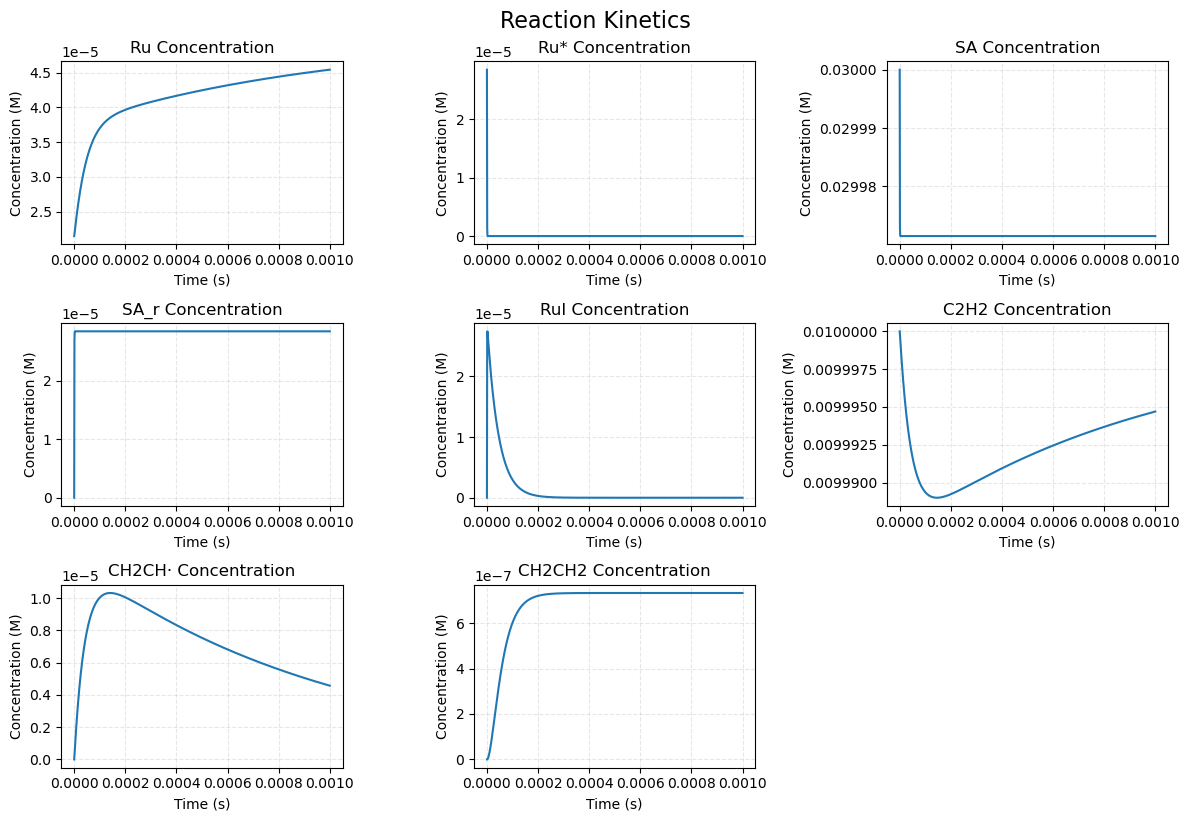

In [5]:
""" 应用动力学模型 3：可视化 """
system_2hv.plot_results()

In [6]:
""" 应用动力学模型 4：取出模拟数据 """
t = system_2hv.solution.t
y = system_2hv.solution.y

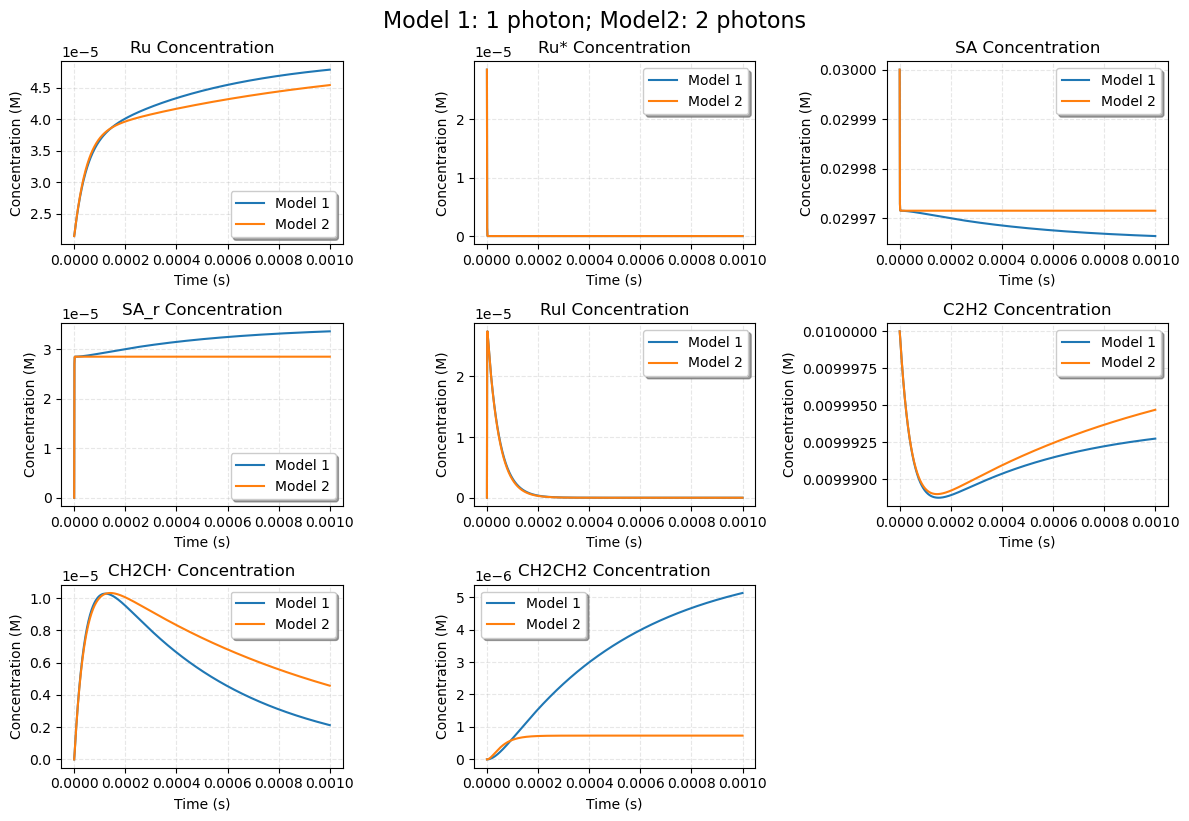

In [7]:
""" 应用动力学模型 5：双模型比较 case1： 脉冲激发的单光子双光子模型对比"""
system_1hv_pulse = ReactionSystem(concentrations = concentrations,
                               epsilon = epsilon,
                               excitation_params = pulse_excitation_params
                              )

system_2hv_pulse = ReactionSystem(concentrations = concentrations,
                               epsilon = epsilon,
                               excitation_params = pulse_excitation_params
                              )

system_1hv_pulse.run_simulation(k_params_1photon, t_span = (0, 0.001))
system_2hv_pulse.run_simulation(k_params_2photon, t_span = (0, 0.001))
system_1hv_pulse.compare_models(system_2hv_pulse, "Model 1: 1 photon; Model2: 2 photons")

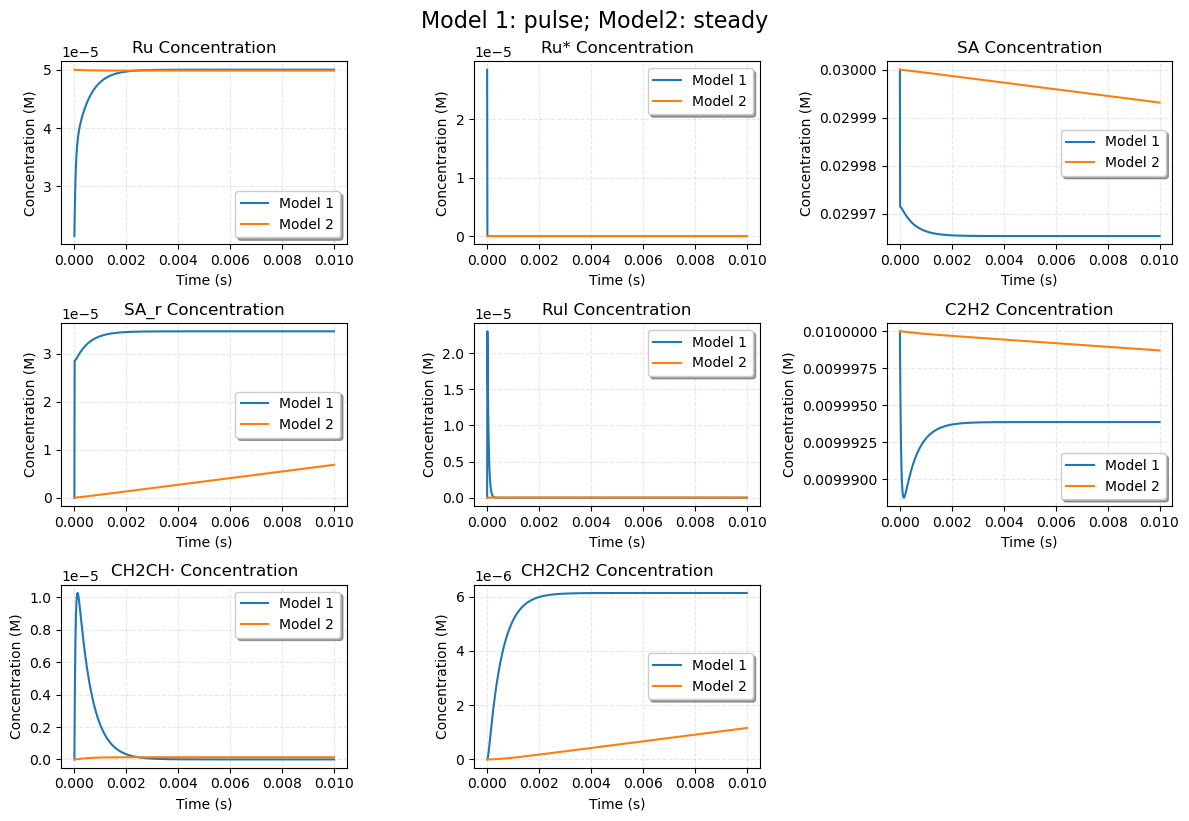

In [8]:
""" 应用动力学模型 5：双模型比较 case2： 稳态与脉冲激发 以单光子模型为例"""
system_2hv_pulse = ReactionSystem(concentrations = concentrations,
                               epsilon = epsilon,
                               excitation_params = pulse_excitation_params
                              )

system_2hv_ss = ReactionSystem(concentrations = concentrations,
                               epsilon = epsilon,
                               excitation_params = steady_excitation_params
                              )

system_2hv_pulse.run_simulation(k_params_1photon, t_span = (0, 0.01))
system_2hv_ss.run_simulation(k_params_1photon, t_span = (0, 0.01))
system_2hv_pulse.compare_models(system_2hv_ss, "Model 1: pulse; Model2: steady")

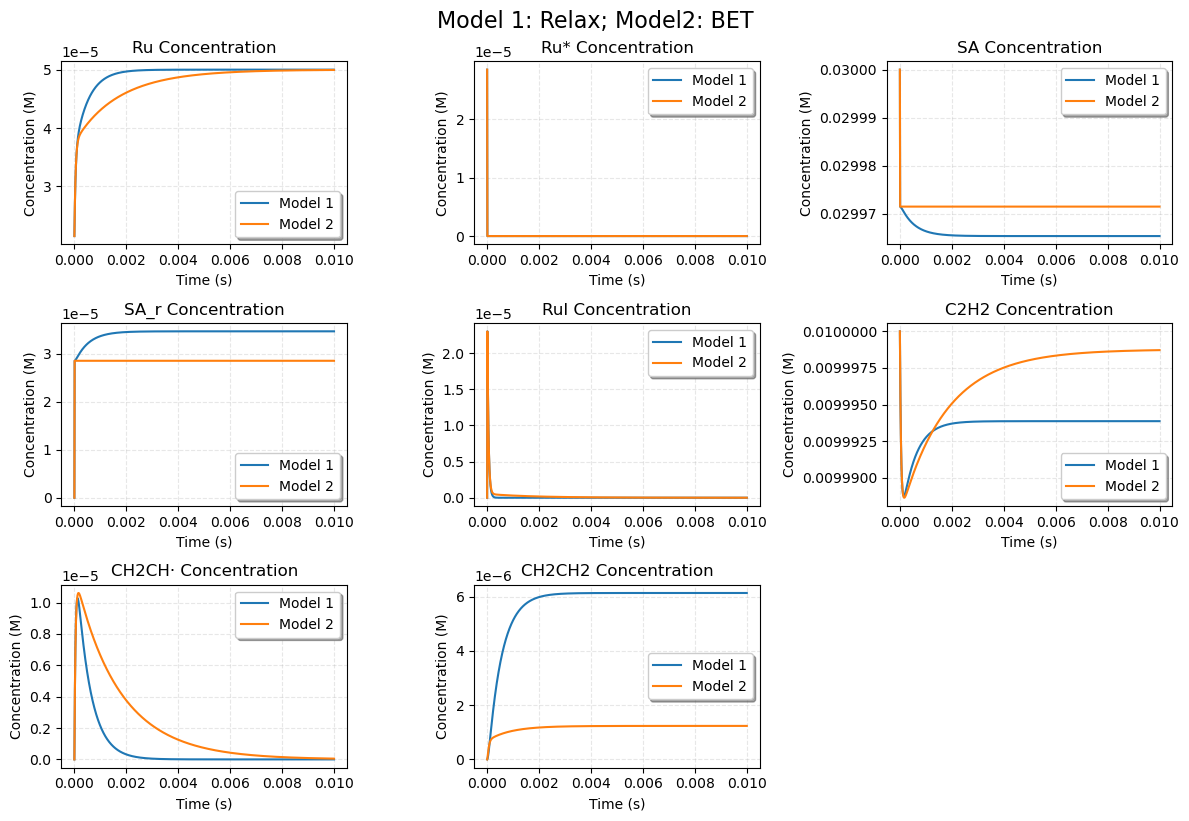

In [20]:
# 动力学参数
# 1-1 CH2CH· 弛豫到基态
k_params_1photon_relax = {
    'k1': 1e8,    # Ru*的猝灭速率
    'k2': 1.2e4,  # RuI的一级衰减
    'k3': 0,      # RuI的二级衰减
    'k4': 1e6,    # PCET基础速率常数
    'k5': 1e3,    # RuIIC的衰减到基态
    'k6': 0,      # 烯基自由基被RuI还原
    'k7': 3e4,    # 烯基自由基被SA还原
    'k8': 0       # RuIIC的BET
    }

# 1-2 CH2CH· 弛豫到基态
k_params_2photon_relax = {
    'k1': 1e8,    # Ru*的猝灭速率
    'k2': 1.2e4,  # RuI的一级衰减
    'k3': 0,      # RuI的二级衰减
    'k4': 1e6,    # PCET基础速率常数
    'k5': 1e3,    # RuIIC的衰减到基态
    'k6': 1e8,      # 烯基自由基被RuI还原
    'k7': 0,    # 烯基自由基被SA还原
    'k8': 0       # RuIIC的BET
    }

# 2-1 CH2CH· back electron transfer
k_params_1photon_bet = {
    'k1': 1e8,    # Ru*的猝灭速率
    'k2': 1.2e4,  # RuI的一级衰减
    'k3': 0,      # RuI的二级衰减
    'k4': 1e6,    # PCET基础速率常数
    'k5': 0,    # RuIIC的衰减到基态
    'k6': 0,      # 烯基自由基被RuI还原
    'k7': 3e4,    # 烯基自由基被SA还原
    'k8': 1e3       # RuIIC的BET
    }

# 2-2 CH2CH· back electron transfer
k_params_2photon_bet = {
    'k1': 1e8,    # Ru*的猝灭速率
    'k2': 1.2e4,  # RuI的一级衰减
    'k3': 0,      # RuI的二级衰减
    'k4': 1e6,    # PCET基础速率常数
    'k5': 0,    # RuIIC的衰减到基态
    'k6': 1e8,      # 烯基自由基被RuI还原
    'k7': 0,    # 烯基自由基被SA还原
    'k8': 1e3       # RuIIC的BET
    }

system_1hv_relax = ReactionSystem(concentrations = concentrations,
                               epsilon = epsilon,
                               excitation_params = pulse_excitation_params
                              )

system_1hv_bet = ReactionSystem(concentrations = concentrations,
                               epsilon = epsilon,
                               excitation_params = pulse_excitation_params
                              )

system_2hv_relax = ReactionSystem(concentrations = concentrations,
                               epsilon = epsilon,
                               excitation_params = pulse_excitation_params
                              )

system_2hv_bet = ReactionSystem(concentrations = concentrations,
                               epsilon = epsilon,
                               excitation_params = pulse_excitation_params
                              )

system_1hv_relax.run_simulation(k_params_1photon_relax, t_span = (0, 0.01))
system_2hv_relax.run_simulation(k_params_2photon_relax, t_span = (0, 0.01))
system_1hv_bet.run_simulation(k_params_1photon_bet, t_span = (0, 0.01))
system_2hv_bet.run_simulation(k_params_2photon_bet, t_span = (0, 0.01))

system_1hv_relax.compare_models(system_2hv_bet, "Model 1: Relax; Model2: BET")

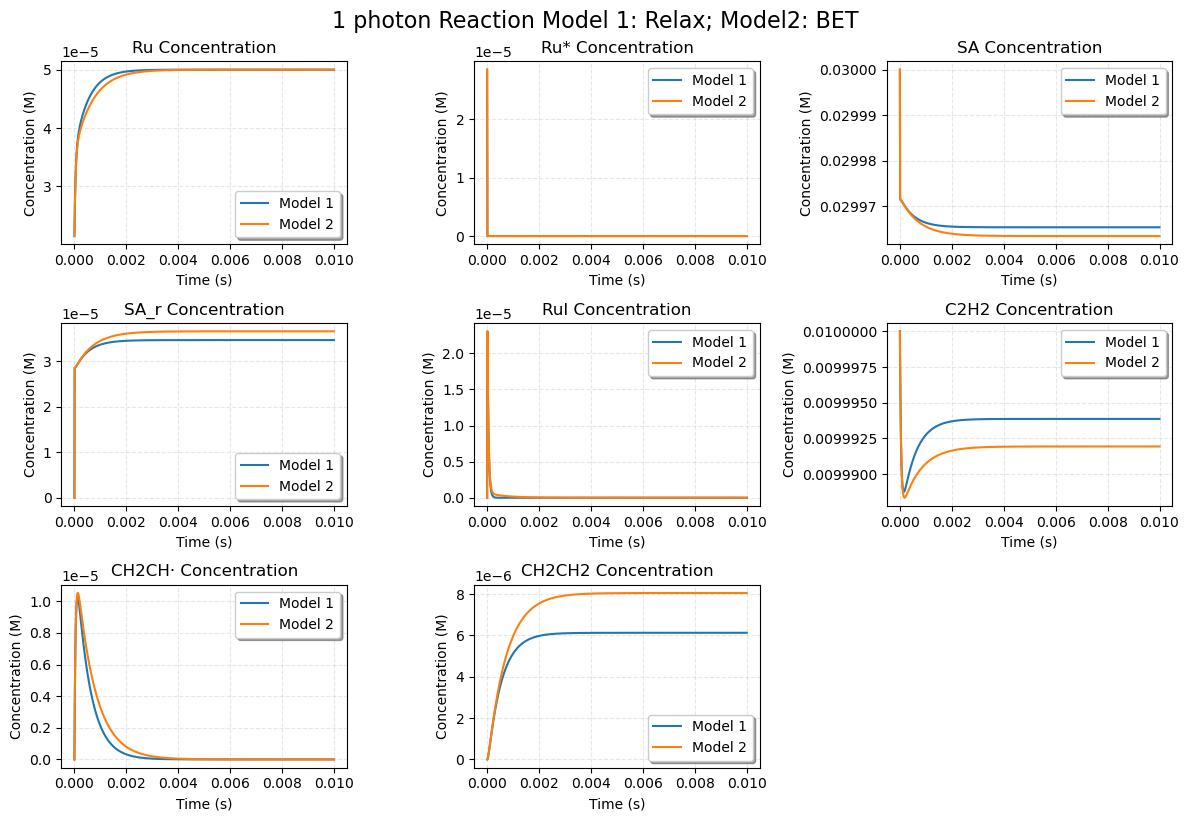

In [21]:
system_1hv_relax.compare_models(system_1hv_bet, "1 photon Reaction Model 1: Relax; Model2: BET")

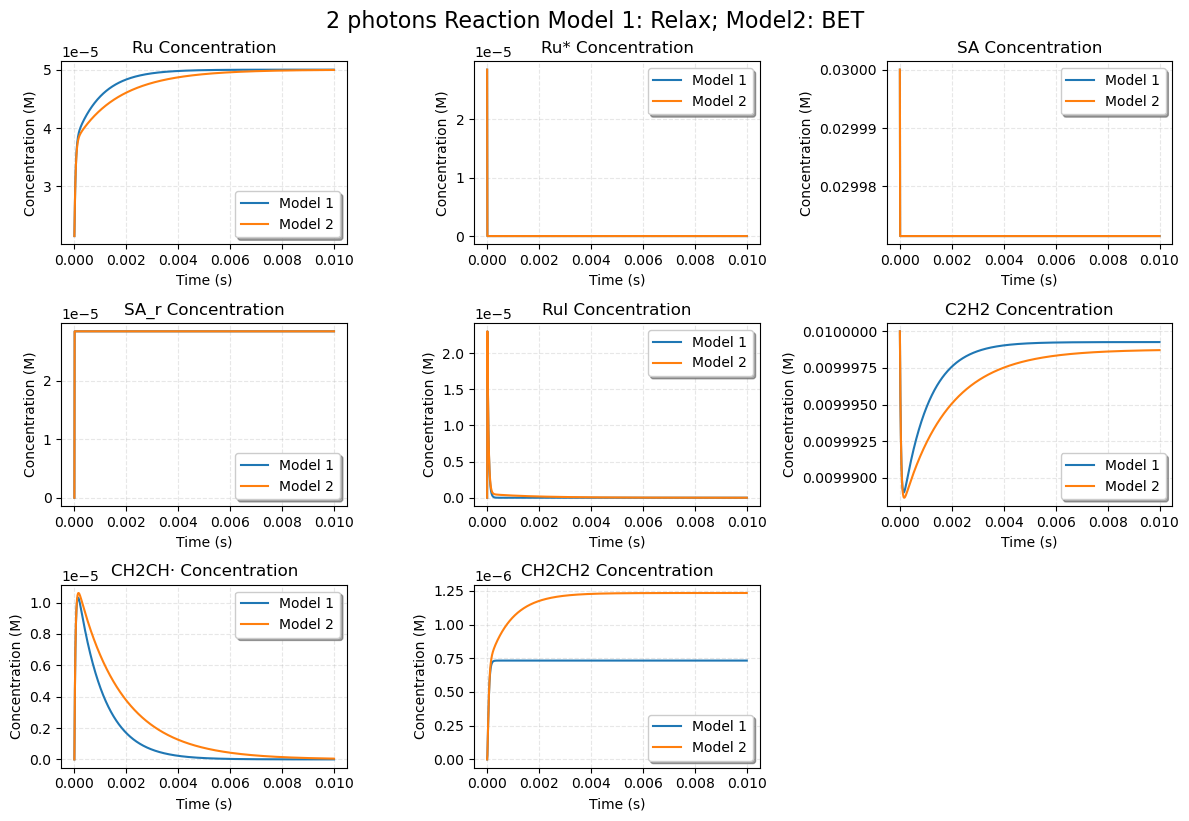

In [22]:
system_2hv_relax.compare_models(system_2hv_bet, "2 photons Reaction Model 1: Relax; Model2: BET")

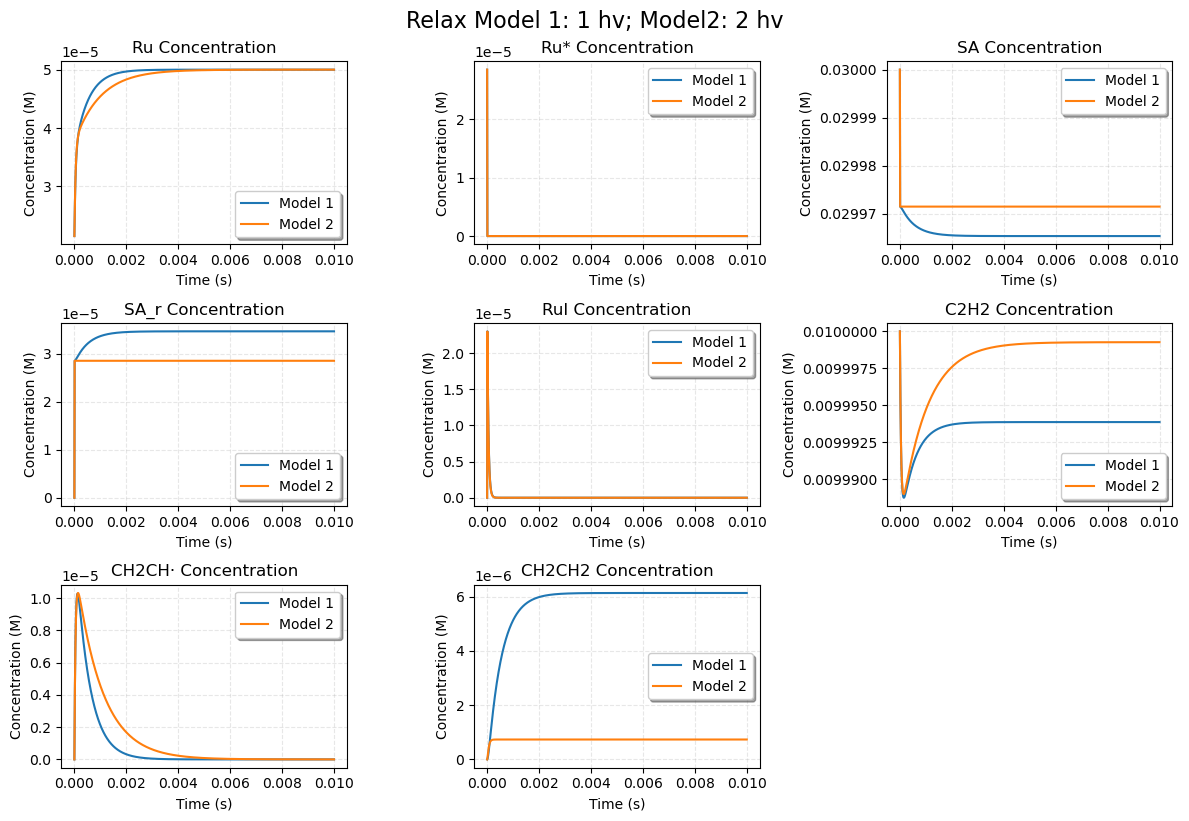

In [23]:
system_1hv_relax.compare_models(system_2hv_relax, "Relax Model 1: 1 hv; Model2: 2 hv")

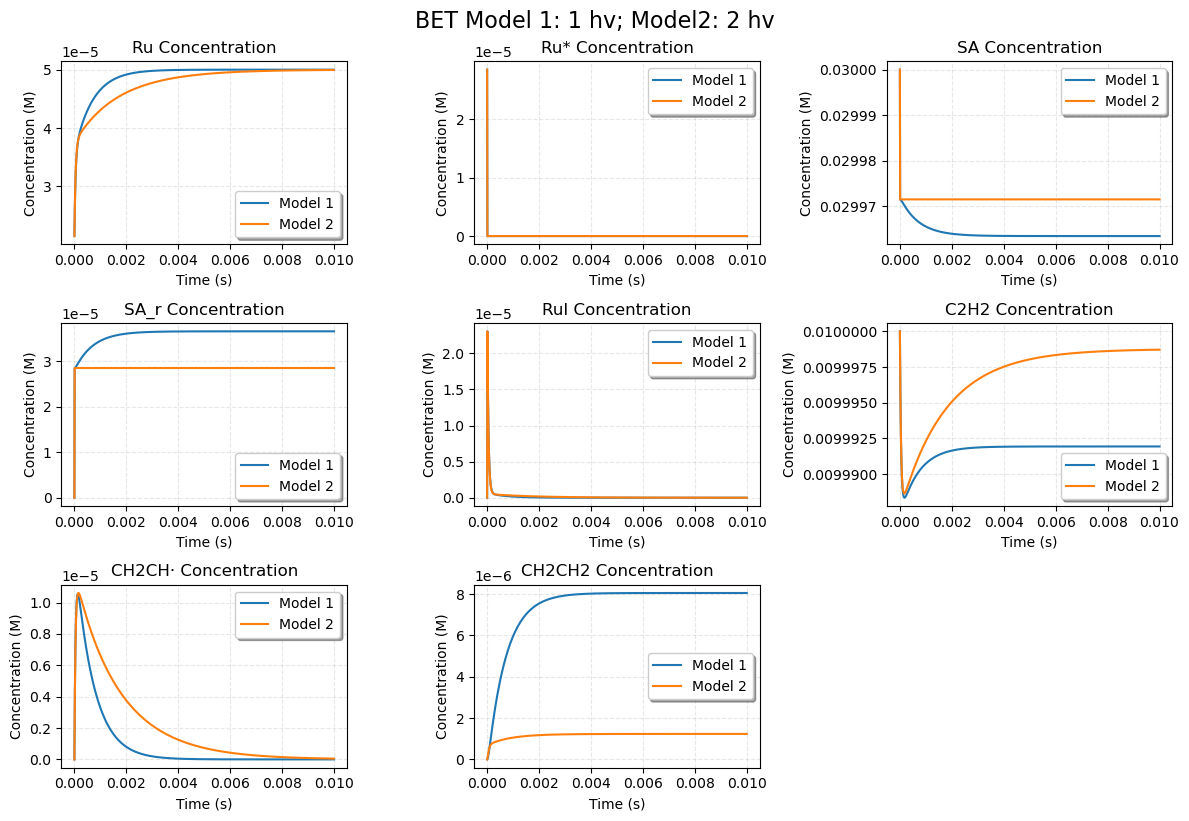

In [24]:
system_1hv_bet.compare_models(system_2hv_bet, "BET Model 1: 1 hv; Model2: 2 hv")

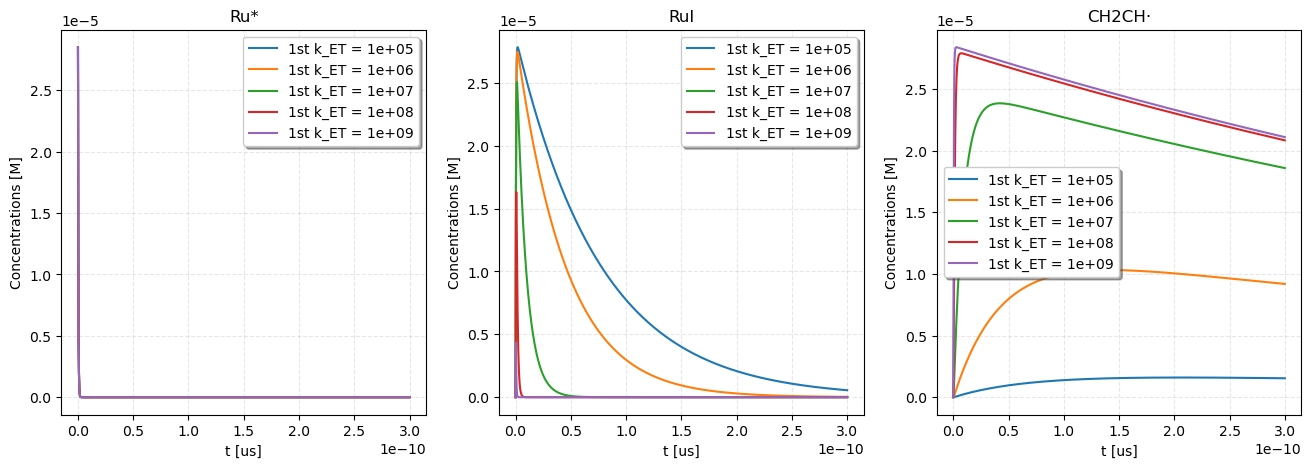

In [10]:
""" 应用动力学模型 6：对一系列参数的扫描，以第一步电子转移速率为例"""
k4_range = np.logspace(5, 9, 5) # 1e5 到 1e9 之间对数均匀取点

plt.figure(figsize= (16,5))
for i in k4_range:
    k_params_2photon_i = {
    'k1': 1e8,    # Ru*的猝灭速率
    'k2': 1.2e4,  # RuI的一级衰减
    'k3': 0,      # RuI的二级衰减
    'k4': i,  # PCET基础速率常数
    'k5': 1e3,    # RuIIC的衰减到基态
    'k6': 1e8,    # 烯基自由基被RuI还原
    'k7': 0,       # 烯基自由基被SA还原
    'k8': 0       # RuIIC的BET
    }
    system_i = ReactionSystem(concentrations = concentrations, 
                              epsilon= epsilon,
                              excitation_params = pulse_excitation_params)
    system_i.run_simulation(k_params_2photon_i,
                            t_span = (0,3e-4))

    plt.subplot(131)
    plt.plot(system_i.solution.t/1e6, system_i.solution.y[1], label = f'1st k_ET = {i:.0e}')
    plt.title("Ru*")
    plt.xlabel('t [us]')
    plt.ylabel('Concentrations [M]')
    plt.grid(ls = '--', alpha = 0.3)
    plt.legend(loc = 'best', frameon = True, shadow = True)

    plt.subplot(132)
    plt.plot(system_i.solution.t/1e6, system_i.solution.y[4], label = f'1st k_ET = {i:.0e}')
    plt.title("RuI")
    plt.xlabel('t [us]')
    plt.ylabel('Concentrations [M]')
    plt.grid(ls = '--', alpha = 0.3)
    plt.legend(loc = 'best', frameon = True, shadow = True)

    plt.subplot(133)
    plt.plot(system_i.solution.t/1e6, system_i.solution.y[6], label = f'1st k_ET = {i:.0e}')
    plt.title("CH2CH·")
    plt.xlabel('t [us]')
    plt.ylabel('Concentrations [M]')
    plt.grid(ls = '--', alpha = 0.3)
    plt.legend(loc = 'best', frameon = True, shadow = True)

plt.show()    

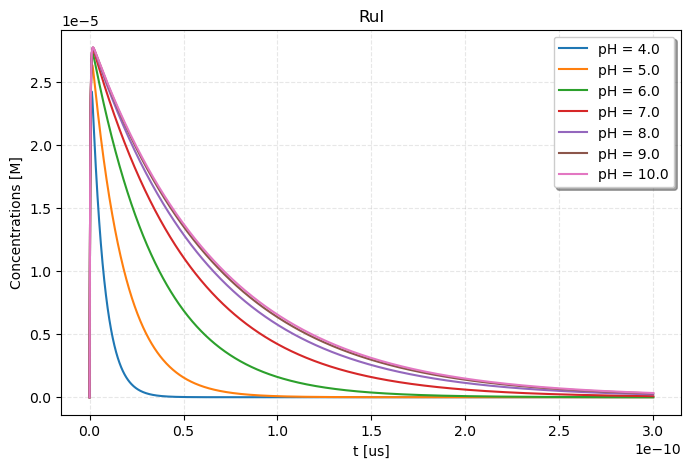

In [13]:
""" 应用动力学模型 7：模拟PCET变化"""
from module_reaction.PCET_module import PCETModel
pH = np.linspace(4, 10 ,7)
k4_range_pH = PCETModel.pcet_rate(pH, 2.4e5, 10**3.75, 0.5)


plt.figure(figsize= (8,5))

for i, pH_i in enumerate(pH):
    k_params_2photon_i_pH = {
    'k1': 1e8,    # Ru*的猝灭速率
    'k2': 1.2e4,  # RuI的一级衰减
    'k3': 0,      # RuI的二级衰减
    'k4': k4_range_pH[i],  # PCET基础速率常数
    'k5': 1e3,    # RuIIC的衰减到基态
    'k6': 1e8,    # 烯基自由基被RuI还原
    'k7': 0,       # 烯基自由基被SA还原
    'k8': 0       # RuIIC的BET
    }
    system_i_pH = ReactionSystem(concentrations = concentrations, 
                              epsilon= epsilon,
                              excitation_params = pulse_excitation_params)
    system_i_pH.run_simulation(k_params_2photon_i_pH,
                            t_span = (0,3e-4))

    plt.plot(system_i_pH.solution.t/1e6, system_i_pH.solution.y[4], label = f'pH = {pH_i}')
    plt.title("RuI")
    plt.xlabel('t [us]')
    plt.ylabel('Concentrations [M]')
    plt.grid(ls = '--', alpha = 0.3)
    plt.legend(loc = 'best', frameon = True, shadow = True)

plt.show() 